### Web scraping for automatic downloading, please skip this part

In [ ]:
# Web scraping libraries
import requests
import urllib.request
from bs4 import BeautifulSoup

# Downloading, moving and unzipping files
import webbrowser
from time import sleep
import shutil
import os
from zipfile import ZipFile

# DataFrame exploration and manipulation 
import pandas as pd
from glob import glob

In [ ]:
url = 'https://s3.amazonaws.com/tripdata/'
response = requests.get(url)
response

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.text, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<ListBucketResult xmlns="http://s3.amazonaws.com/doc/2006-03-01/"><Name>tripdata</Name><Prefix/><Marker/><MaxKeys>1000</MaxKeys><IsTruncated>false</IsTruncated><Contents><Key>201306-citibike-tripdata.zip</Key><LastModified>2018-04-30T13:18:55.000Z</LastModified><ETag>"b520a12de58eea58a3586f89bfcfbd9d-2"</ETag><Size>16785103</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201307-201402-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:25.000Z</LastModified><ETag>"7b3b260b2ab2e5349320121d04bd821c-22"</ETag><Size>178262576</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201307-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:27.000Z</LastModified><ETag>"dd3e6fd5f91715b31eae72868086c08c-4"</ETag><Size>27074629</Size><StorageClass>STANDARD</StorageClass></Contents><Contents><Key>201308-citibike-tripdata.zip</Key><LastModified>2017-01-18T22:23:27.000Z</LastModified><ETag>"2f661063576734f614b9f1d

In [ ]:
data_files = soup.find_all('Key')
data_files

[<Key>201306-citibike-tripdata.zip</Key>,
 <Key>201307-201402-citibike-tripdata.zip</Key>,
 <Key>201307-citibike-tripdata.zip</Key>,
 <Key>201308-citibike-tripdata.zip</Key>,
 <Key>201309-citibike-tripdata.zip</Key>,
 <Key>201310-citibike-tripdata.zip</Key>,
 <Key>201311-citibike-tripdata.zip</Key>,
 <Key>201312-citibike-tripdata.zip</Key>,
 <Key>201401-citibike-tripdata.zip</Key>,
 <Key>201402-citibike-tripdata.zip</Key>,
 <Key>201403-citibike-tripdata.zip</Key>,
 <Key>201404-citibike-tripdata.zip</Key>,
 <Key>201405-citibike-tripdata.zip</Key>,
 <Key>201406-citibike-tripdata.zip</Key>,
 <Key>201407-citibike-tripdata.zip</Key>,
 <Key>201408-citibike-tripdata.zip</Key>,
 <Key>201409-citibike-tripdata.zip</Key>,
 <Key>201410-citibike-tripdata.zip</Key>,
 <Key>201411-citibike-tripdata.zip</Key>,
 <Key>201412-citibike-tripdata.zip</Key>,
 <Key>201501-citibike-tripdata.zip</Key>,
 <Key>201502-citibike-tripdata.zip</Key>,
 <Key>201503-citibike-tripdata.zip</Key>,
 <Key>201504-citibike-tripd

In [ ]:
# Instantiate empty list
zip_files = []
# Populate list with zip file names
for file in range(len(data_files)-1):
    zip_files.append(data_files[file].get_text())
# Download Jersey City zip files
for file in zip_files:
    webbrowser.open_new(url + file)
    sleep(7)

### Analysis done on the full 2019-2020 dataset, plotting takes forever...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
%matplotlib inline

In [ ]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 92kB 3.5MB/s 


In [ ]:
from google.colab import drive
# I saved the merged data to my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dask.dataframe as dd

path = '/content/drive/My Drive/combined_2019_2020_clean.csv'
cols = ['tripduration', 'starttime', 'stoptime','start_station_id','end_station_id',\
        'usertype', 'birth_year', 'gender']
df = dd.read_csv(path, usecols = cols, 
                 dtype={'end_station_id': 'float64','start_station_id': 'float64'})
df['start_date']=dd.to_datetime(df['starttime']).dt.strftime("%Y%m%d")
df['start_year']=dd.to_datetime(df['starttime']).dt.year
df['start_month']=dd.to_datetime(df['starttime']).dt.month
df['start_hour']=dd.to_datetime(df['starttime']).dt.hour
df['start_dayofweek']=dd.to_datetime(df['starttime']).dt.dayofweek
df.head()

tripduration                 starttime  ... start_hour  start_dayofweek
0           320  2019-01-01 00:01:47.4010  ...          0                1
1           316  2019-01-01 00:04:43.7360  ...          0                1
2           591  2019-01-01 00:06:03.9970  ...          0                1
3          2719  2019-01-01 00:07:03.5450  ...          0                1
4           303  2019-01-01 00:07:35.9450  ...          0                1

[5 rows x 13 columns]

In [ ]:
df = df.drop('starttime', axis=1)
df = df.drop('stoptime', axis=1)
df.head()

tripduration  start_station_id  ...  start_hour start_dayofweek
0           320            3160.0  ...           0               1
1           316             519.0  ...           0               1
2           591            3171.0  ...           0               1
3          2719             504.0  ...           0               1
4           303             229.0  ...           0               1

[5 rows x 11 columns]

In [ ]:
d_pickup = df.groupby(['start_date', 'start_station_id'])\
                                                    .size().reset_index()
d_pickup.columns = ['date', 'st_id', 'pickups']

In [ ]:
# Create datetime-related columns
d_pickup['datetime'] = dd.to_datetime(d_pickup['date'], format='%Y%m%d')
d_pickup['year'] = d_pickup.datetime.dt.year
d_pickup['month'] = d_pickup.datetime.dt.month
d_pickup['day'] = d_pickup.datetime.dt.day
d_pickup['dayofweek'] = d_pickup.datetime.dt.dayofweek
d_pickup.groupby(['year', 'month']).count()

In [ ]:
usage_by_month = d_pickup.groupby(['year', 'month']).count().compute()

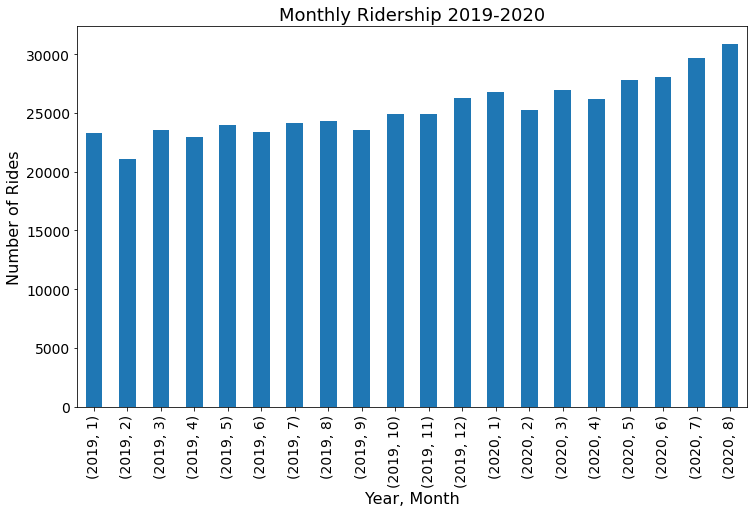

In [ ]:
# Plot the monthly usage since the inception
plt.figure(figsize=(12, 7))
ax = usage_by_month['pickups'].plot(kind='bar')
ax.set_xlabel('Year, Month', fontsize=16)
ax.set_ylabel('Number of Rides', fontsize=16)
ax.set_title('Monthly Ridership 2019-2020', fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [ ]:
df['tripduration']/=60
df['tripduration'].describe(percentiles=[.25, .5, .75, .85, .9, .99]).compute()

count    3.249583e+07
mean     1.869196e+01
std      2.047881e+02
min      1.016667e+00
25%      8.633333e+00
50%      1.510000e+01
75%      2.488333e+01
85%      2.991667e+01
90%      4.275000e+01
99%      1.436167e+02
max      6.354443e+04
Name: tripduration, dtype: float64

In [ ]:
%%time
# Based on the above, remove any entry with duration more than 2hours. This would easily cover 99% of the rides
durations = df[df['tripduration']<=120]
dur_2019 = durations[durations['start_year']==2019]['tripduration'].compute()
dur_2020 = durations[durations['start_year']==2020]['tripduration'].compute()

CPU times: user 11min 16s, sys: 22.2 s, total: 11min 39s
Wall time: 9min 59s


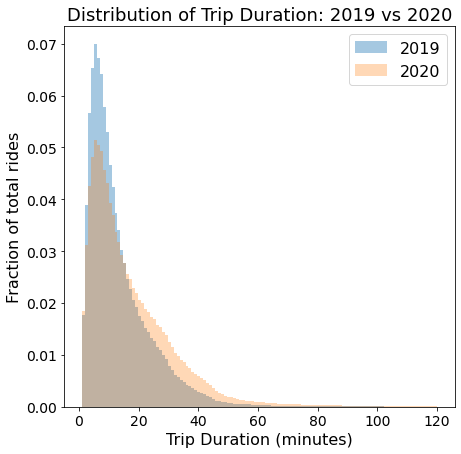

In [ ]:
# Plot frequency distribution of trip duration
plt.figure(figsize=(7, 7))
plt.hist(dur_2019, bins=120, density=True, label='2019', alpha=0.4)
plt.hist(dur_2020, bins=120, density=True, label='2020', alpha=0.3)
plt.title('Distribution of Trip Duration: 2019 vs 2020', fontsize=18)
plt.xlabel('Trip Duration (minutes)', fontsize=16)
plt.ylabel('Fraction of total rides', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=16) 

In [ ]:
durations = df[df['tripduration']<=120]
dur_2019 = durations[durations['start_year']==2019]
dur_2019_JanToAug = dur_2019[dur_2019['start_month'] <=8]['tripduration']
dur_2019_JanToAug = dur_2019_JanToAug.compute()
dur_2020 = durations[durations['start_year']==2020]['tripduration'].compute()

In [ ]:
dur_2019 = dur_2019.compute()

In [ ]:
dur_2019_JanToAug = dur_2019[dur_2019['start_month'] <=8]['tripduration']

In [ ]:
%%time
# Get subscriber and non-subscriber data
df_subs_2019_dur = durations[(durations['start_year']==2019) & (durations['usertype']=='Subscriber')]
df_subs_2020_dur = durations[(durations['start_year']==2020) & (durations['usertype']=='Subscriber')]['tripduration'].compute()
df_subs_2019_JanToAug = df_subs_2019_dur[df_subs_2019_dur['start_month'] <=8]['tripduration'].compute()
df_nsubs_2019_dur = durations[(durations['start_year']==2019) & (durations['usertype']!='Subscriber')]
df_nsubs_2020_dur = durations[(durations['start_year']==2020) & (durations['usertype']!='Subscriber')]['tripduration'].compute()
df_nsubs_2019_JanToAug = df_nsubs_2019_dur[df_nsubs_2019_dur['start_month'] <=8]['tripduration'].compute()

CPU times: user 22min 29s, sys: 29.7 s, total: 22min 59s
Wall time: 19min 32s


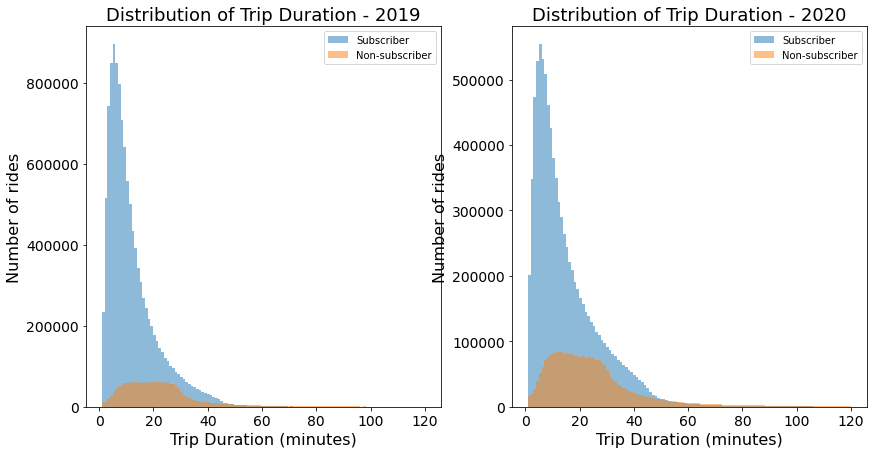

In [ ]:
# Histograms for Tripdurations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=False, sharex=True)
ax1.hist(df_subs_2019_JanToAug, bins=120, alpha=0.5, label='Subscriber')
ax1.hist(df_nsubs_2019_JanToAug, bins=120, alpha=0.5, label='Non-subscriber')
ax1.set_title('Distribution of Trip Duration - 2019', fontsize=18)
ax1.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax1.set_ylabel('Number of rides', fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax1.legend()

ax2.hist(df_subs_2020_dur, bins=120, alpha=0.5, label='Subscriber')
ax2.hist(df_nsubs_2020_dur, bins=120, alpha=0.5, label='Non-subscriber')
ax2.set_title('Distribution of Trip Duration - 2020', fontsize=18)
ax2.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax2.set_ylabel('Number of rides', fontsize=16)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax2.legend()

In [ ]:
!pip install hvplot

In [ ]:
import hvplot.dask
df['age'] = df['start_year'] - df['birth_year']
df_2019 = df[df['start_year']==2019]
df_2020 = df[df['start_year']==2020]
df_2019.hvplot.hist(y='age', bin_range=(0, 100), bins=50)

:Histogram   [age]   (age_count)

In [ ]:
import hvplot.dask
df['age'] = df['start_year'] - df['birth_year']
df_2019 = df[df['start_year']==2019]
df_2020 = df[df['start_year']==2020]
df_2020.hvplot.hist(y='age', bin_range=(0, 100), bins=50)

:Histogram   [age]   (age_count)

subset age of 51

## Randomly sample 10% data from the full dataset for fast plotting

get station information and save it as a separate file

In [ ]:
import dask.dataframe as dd
path = '/content/drive/My Drive/combined_2019_2020_clean.csv'
station = dd.read_csv(path, usecols = ['start_station_id','start_station_name'], 
                 dtype={'end_station_id': 'float64','start_station_id': 'float64'})
station_df = station.drop_duplicates().compute()
station_df.head()

start_station_id           start_station_name
0            3160.0  Central Park West & W 76 St
1             519.0        Pershing Square North
2            3171.0      Amsterdam Ave & W 82 St
3             504.0              1 Ave & E 16 St
4             229.0               Great Jones St

In [ ]:
station_df.to_csv('station_info.csv')

In [ ]:
import dask.dataframe as dd

path = '/content/drive/My Drive/combined_2019_2020_clean.csv'
cols = ['tripduration', 'starttime', 'stoptime','start_station_id','end_station_id',\
        'usertype', 'birth_year', 'gender']
df = dd.read_csv(path, usecols = cols, 
                 dtype={'end_station_id': 'float64','start_station_id': 'float64'})
df = df.compute()
#df.head()
df_subset = df.sample(frac=0.01, random_state=1)  # random samplling
df_subset.head()
df_subset.to_csv('2019_2020_subset.csv')

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

def add_date_info(data):
  data['start_date'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.strftime("%Y%m%d")
  data['start_date_hour'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.strftime("%Y%m%d%H")
  data['start_year'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.year
  data['start_month'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.month
  data['start_day'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.day
  data['start_hour'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.hour
  data['start_dayofweek'] = pd.to_datetime(data['starttime'], \
                      infer_datetime_format=True).dt.day_name()
  data['end_date'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.strftime("%Y%m%d")
  data['end_date_hour'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.strftime("%Y%m%d%H")
  data['end_year'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.year
  data['end_month'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.month
  data['end_day'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.day
  data['end_hour'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.hour
  data['end_dayofweek'] = pd.to_datetime(data['stoptime'], \
                      infer_datetime_format=True).dt.dayofweek
  data.drop(['starttime','stoptime'], axis=1, inplace=True)
  return data

df_sub = pd.read_csv('2019_2020_subset.csv')
df_sub = add_date_info(df_sub)

In [ ]:
df_sub.describe()

Unnamed: 0  tripduration  ...       end_hour  end_dayofweek
count  324958.000000  3.249580e+05  ...  324958.000000  324958.000000
mean   178441.813764  1.118768e+03  ...      14.226780       2.956868
std    103176.463486  1.242323e+04  ...       4.861565       1.972098
min         1.000000  6.100000e+01  ...       0.000000       0.000000
25%     88898.000000  3.820000e+02  ...      10.000000       1.000000
50%    178870.000000  6.710000e+02  ...      15.000000       3.000000
75%    267835.000000  1.218000e+03  ...      18.000000       5.000000
max    358847.000000  2.655419e+06  ...      23.000000       6.000000

[8 rows x 15 columns]

In [ ]:
def count_pickups_dropoffs(data):
    '''
    Function to count pickups and dropoffs
    '''
    subs = data[data.usertype == 'Subscriber']
    nsubs = data[data.usertype == 'Customer']

    # Get pickups information
    pickups_subs = subs.groupby(['start_date', 'start_station_id'])\
                                                    .size().reset_index()
    pickups_nsubs = nsubs.groupby(['start_date', 'start_station_id'])\
                                                    .size().reset_index()
    pickups_subs.columns = ['date', 'st_id', 'pickups']
    pickups_nsubs.columns = ['date', 'st_id', 'pickups']

    # Get dropoffs information
    dropoffs_subs = subs.groupby(['end_date', 'end_station_id'])\
                                                    .size().reset_index()
    dropoffs_nsubs = nsubs.groupby(['end_date', 'end_station_id'])\
                                                    .size().reset_index()
    dropoffs_subs.columns = ['date', 'st_id', 'dropoffs']
    dropoffs_nsubs.columns = ['date', 'st_id', 'dropoffs']

    pickups_subs = pickups_subs.astype(int)
    pickups_nsubs = pickups_nsubs.astype(int)
    dropoffs_subs = dropoffs_subs.astype(int)
    dropoffs_nsubs = dropoffs_nsubs.astype(int)

    return [pickups_subs, pickups_nsubs, dropoffs_subs, dropoffs_nsubs]

In [ ]:
def count_pickups_dropoffs2(data):
    '''
    Count hourly pickups and dropoffs. Revised version.
    '''
    subs = data[data.usertype == 'Subscriber']
    nsubs = data[data.usertype == 'Customer']

    # Get pickups information
    pickups_subs = subs.groupby(['start_date_hour', 'start_station_id'])\
                                                    .size().reset_index()
    pickups_nsubs = nsubs.groupby(['start_date_hour', 'start_station_id'])\
                                                    .size().reset_index()
    pickups_subs.columns = ['date_hour', 'st_id', 'pickups']
    pickups_nsubs.columns = ['date_hour', 'st_id', 'pickups']

    # Get dropoffs information
    dropoffs_subs = subs.groupby(['end_date_hour', 'end_station_id'])\
                                                    .size().reset_index()
    dropoffs_nsubs = nsubs.groupby(['end_date_hour', 'end_station_id'])\
                                                    .size().reset_index()
    dropoffs_subs.columns = ['date_hour', 'st_id', 'dropoffs']
    dropoffs_nsubs.columns = ['date_hour', 'st_id', 'dropoffs']

    pickups_subs = pickups_subs.astype(int)
    pickups_nsubs = pickups_nsubs.astype(int)
    dropoffs_subs = dropoffs_subs.astype(int)
    dropoffs_nsubs = dropoffs_nsubs.astype(int)

    return [pickups_subs, pickups_nsubs, dropoffs_subs, dropoffs_nsubs]

In [ ]:
pickups_subs = pd.DataFrame(columns=['date', 'st_id', 'pickups'])
pickups_nsubs = pd.DataFrame(columns=['date', 'st_id', 'pickups'])
dropoffs_subs = pd.DataFrame(columns=['date', 'st_id', 'dropoffs'])
dropoffs_nsubs = pd.DataFrame(columns=['date', 'st_id', 'dropoffs'])

# Same thing for hourly data
pickups_subs_hourly = pd.DataFrame(columns=['date_hour', 'st_id', 'pickups'])
pickups_nsubs_hourly = pd.DataFrame(columns=['date_hour', 'st_id', 'pickups'])
dropoffs_subs_hourly = pd.DataFrame(columns=['date_hour', 'st_id', 'dropoffs'])
dropoffs_nsubs_hourly = pd.DataFrame(columns=['date_hour', 'st_id', 'dropoffs'])

[p_s, p_ns, d_s, d_ns] = count_pickups_dropoffs(df_sub)
[p_s_hourly, p_ns_hourly, d_s_hourly, d_ns_hourly] = \
                        count_pickups_dropoffs2(df_sub)

pickups_subs = pd.concat([pickups_subs, p_s], axis=0)
pickups_nsubs = pd.concat([pickups_nsubs, p_ns], axis=0)
dropoffs_subs = pd.concat([dropoffs_subs, d_s], axis=0)
dropoffs_nsubs = pd.concat([dropoffs_nsubs, d_ns], axis=0)

pickups_subs_hourly = pd.concat([pickups_subs_hourly, p_s_hourly], axis=0)
pickups_nsubs_hourly = pd.concat([pickups_nsubs_hourly, p_ns_hourly], axis=0)
dropoffs_subs_hourly = pd.concat([dropoffs_subs_hourly, d_s_hourly], axis=0)
dropoffs_nsubs_hourly = pd.concat([dropoffs_nsubs_hourly, d_ns_hourly], axis=0)

In [ ]:
d_pickup = pd.concat([pickups_subs, pickups_nsubs], axis=0)
d_pickup.head()

date st_id pickups
0  20190101    72       4
1  20190101    79       1
2  20190101   120       2
3  20190101   127       2
4  20190101   128       1

In [ ]:
# Create datetime-related columns
d_pickup['datetime'] = pd.to_datetime(d_pickup['date'], format='%Y%m%d')
d_pickup['year'] = d_pickup.datetime.dt.year
d_pickup['month'] = d_pickup.datetime.dt.month
d_pickup['day'] = d_pickup.datetime.dt.day
d_pickup['dayofweek'] = d_pickup.datetime.dt.dayofweek
d_pickup.groupby(['year', 'month']).count()

date  st_id  pickups  datetime    day  dayofweek
year month                                                   
2019 1      22016  22016    22016     22016  22016      22016
     2      20894  20894    20894     20894  20894      20894
     3      26315  26315    26315     26315  26315      26315
     4      30711  30711    30711     30711  30711      30711
     5      32460  32460    32460     32460  32460      32460
     6      34682  34682    34682     34682  34682      34682
     7      36200  36200    36200     36200  36200      36200
     8      37291  37291    37291     37291  37291      37291
     9      36222  36222    36222     36222  36222      36222
     10     34065  34065    34065     34065  34065      34065
     11     28550  28550    28550     28550  28550      28550
     12     24472  24472    24472     24472  24472      24472
2020 1      26834  26834    26834     26834  26834      26834
     2      25813  25813    25813     25813  25813      25813
     3      29013  29013    29013     29013  29013      29013
     4      27129  27129    27129     27129  27129      27129
     5      39478  39478    39478     39478  39478      39478
     6      43247  43247    43247     43247  43247      43247
     7      45871  45871    45871     45871  45871      45871
     8      48003  48003    48003     48003  48003      48003

### Seasonal pattern

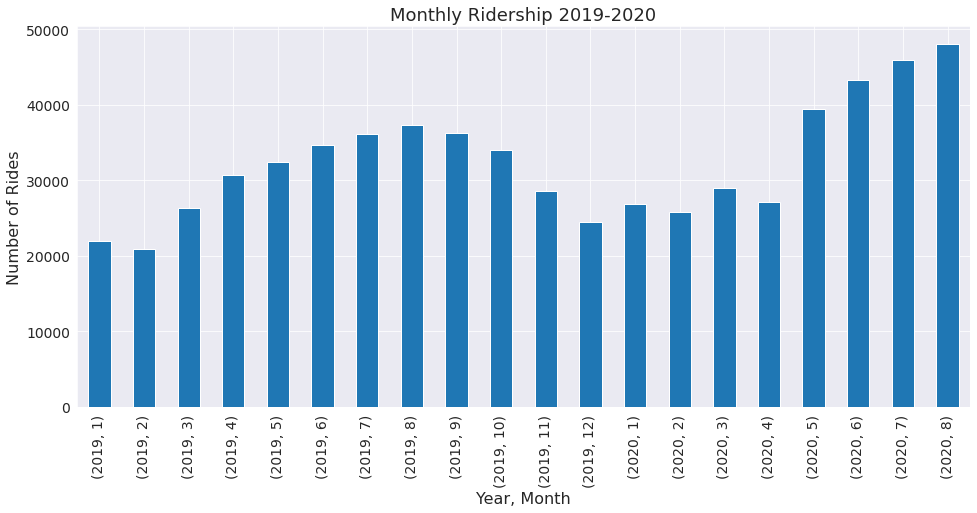

In [ ]:
# Plot the monthly usage since the inception
usage_by_month = d_pickup.groupby(['year', 'month']).count()
plt.figure(figsize=(16, 7))
ax = usage_by_month['pickups'].plot(kind='bar')
ax.set_xlabel('Year, Month', fontsize=16)
ax.set_ylabel('Number of Rides', fontsize=16)
ax.set_title('Monthly Ridership 2019-2020', fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

### Monthly ridership

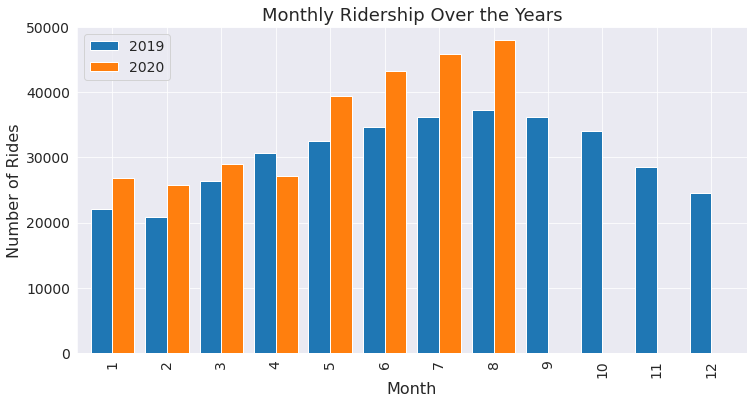

In [ ]:
# Same plot as above but with a different grouping of bars
usage_by_month2 = d_pickup.groupby(['year', 'month']).count()['pickups'].unstack('year')

sns.set_style("darkgrid")
ax2 = usage_by_month2.plot(kind='bar', figsize=(12,6), width=0.8)# colormap='Set3')
ax2.legend(loc='upper left', fontsize=14)
ax2.set_xlabel('Month', fontsize=16)
ax2.set_ylabel('Number of Rides', fontsize=16)
ax2.set_title('Monthly Ridership Over the Years', fontsize=18)
ax2.set_ylim([0, 50000])
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

### Trip duration

In [ ]:
# Convert Trip duration to minutes
df_sub['tripduration'] /= 60
df_sub.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99, 0.999]).astype(int)

Unnamed: 0  tripduration  ...  end_hour  end_dayofweek
count      324958        324958  ...    324958         324958
mean       178441            18  ...        14              2
std        103176           207  ...         4              1
min             1             1  ...         0              0
25%         88898             6  ...        10              1
50%        178870            11  ...        15              3
75%        267835            20  ...        18              5
95%        339015            39  ...        21              6
99%        353369            74  ...        23              6
99.9%      356902           393  ...        23              6
max        358847         44256  ...        23              6

[11 rows x 15 columns]

In [ ]:
df_trip_summary = df_sub[['tripduration']].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).astype(int)
df_trip_summary.T

count  mean  std  min  25%  50%  75%  95%  99%    max
tripduration  324958    18  207    1    6   11   20   39   74  44256

In [ ]:
# select only data from March to August
df_sub = df_sub[(df_sub['start_month']<=8) & (df_sub['start_month']>=3)]
df_sub['year'] = df_sub['start_year'].astype(str)
df_sub_dur = df_sub[df_sub['tripduration']<=120][['tripduration', 'usertype','year']]

In [ ]:
# Get subscriber and non-subscriber data
df_sub_2019 = df_sub[(df_sub['start_year']==2019)]
df_sub_2020 = df_sub[(df_sub['start_year']==2020)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white", palette="BuPu", color_codes=True, font_scale=3)

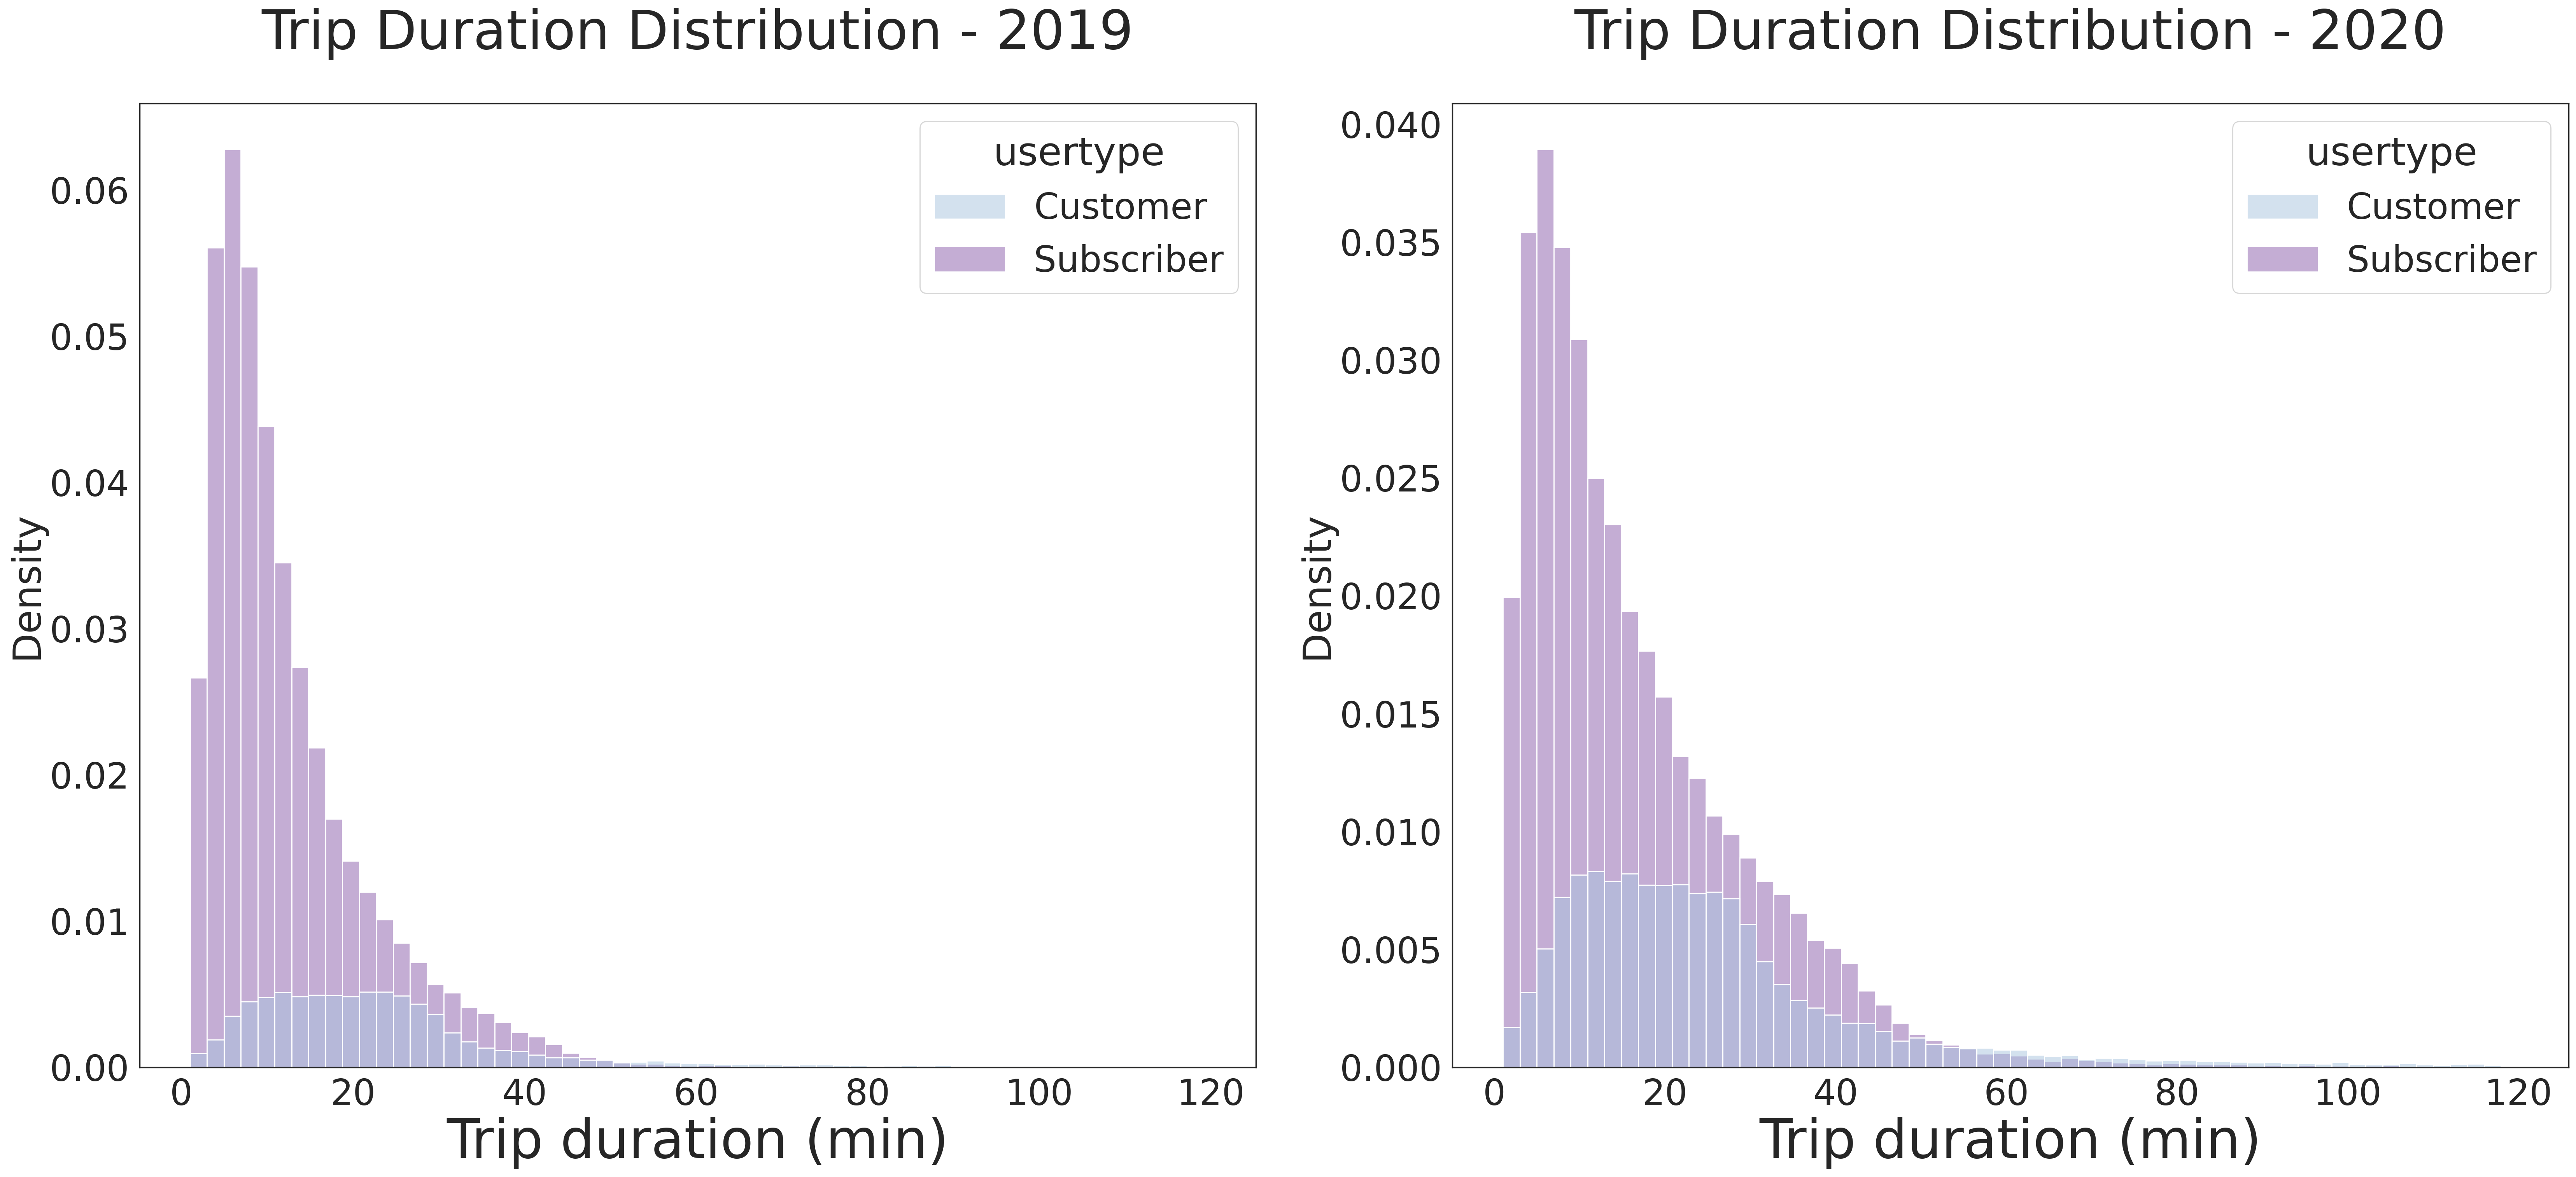

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(34,16), dpi=200)
y_title_margin = 1.05
sns.histplot(df_sub_2019[df_sub_2019['tripduration']<=120], bins=60, \
             x="tripduration", hue="usertype", stat='density', palette="BuPu", ax=ax[0])
sns.histplot(df_sub_2020[df_sub_2020['tripduration']<=120], palette="BuPu", bins=60, \
             x="tripduration", hue="usertype", stat='density', ax=ax[1])
ax[0].set_title("Trip Duration Distribution - 2019",y = y_title_margin, fontsize=50)
ax[1].set_title("Trip Duration Distribution - 2020",y = y_title_margin, fontsize=50)
ax[0].set_xlabel("Trip duration (min)", fontsize=50)
ax[1].set_xlabel("Trip duration (min)", fontsize=50)
fig.tight_layout()

In [ ]:
import scipy.stats as stats

df_sub_2019_dur = df_sub_2019[df_sub_2019['tripduration']<=120]
df_sub_2020_dur = df_sub_2020[df_sub_2020['tripduration']<=120]
df_sub_2019_customer = df_sub_2019_dur[df_sub_2019_dur['usertype']=='Customer']['tripduration']
df_sub_2019_subscriber = df_sub_2019_dur[df_sub_2019_dur['usertype']=='Subscriber']['tripduration']
df_sub_2020_customer = df_sub_2020_dur[df_sub_2020_dur['usertype']=='Customer']['tripduration']
df_sub_2020_subscriber = df_sub_2020_dur[df_sub_2020_dur['usertype']=='Subscriber']['tripduration']

In [ ]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions
mann_whitney_u_test(list(df_sub_2019_customer), list(df_sub_2019_subscriber))

(440481938.5, 0.0)

In [ ]:
mann_whitney_u_test(list(df_sub_2020_customer), list(df_sub_2020_subscriber))

(587710971.5, 0.0)

In [ ]:
mann_whitney_u_test(list(df_sub_2019_customer), list(df_sub_2020_customer))

(216363366.0, 1.4072287131189288e-28)

In [ ]:
mann_whitney_u_test(list(df_sub_2019_subscriber), list(df_sub_2020_subscriber))

(2772629871.0, 0.0)

The second Python output is the p-value associated with the test. The lower the p-value, the stronger the evidence against the null hypothesis. As a general rule of thumb, when the p-value is below 0.05, the null hypothesis can be rejected. The p-value for this specific example is so low that it registers as 0, so we can definitely reject the null hypothesis. This outcome verifies, with statistical significance, that the age distribution for people making more than $50K/year differs from the age distribution for people making less than $50K/year.

### Age distribution

In [ ]:
# Drop entries with invalid 'birth year' field
age = df_sub.copy()
age['birth_year'] = age['birth_year'].astype(float).astype(int)
age['start_year'] = age['start_year'].astype(int)
age['age'] = age['start_year'] - age['birth_year']
age = age[age['age']<=100]

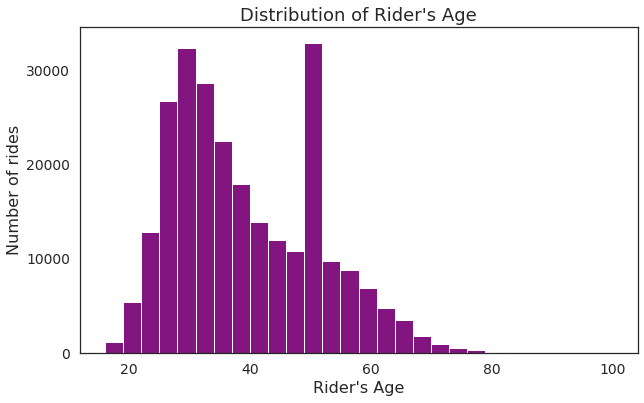

In [ ]:
# Plot age distribution of riders. Only include ones whose age is less than or equal to 100
# Based on the above, remove any entry with duration more than 4hours. This would cover 99.9% of the rides
age_distribution = age[age.age <= 100]['age']
ax4 = age_distribution.plot(kind='hist', bins=28, figsize=(10,6))
ax4.set_title('Distribution of Rider\'s Age', fontsize=18)
ax4.set_xlabel('Rider\'s Age', fontsize=16)
ax4.set_ylabel('Number of rides', fontsize=16)
for tick in ax4.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax4.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

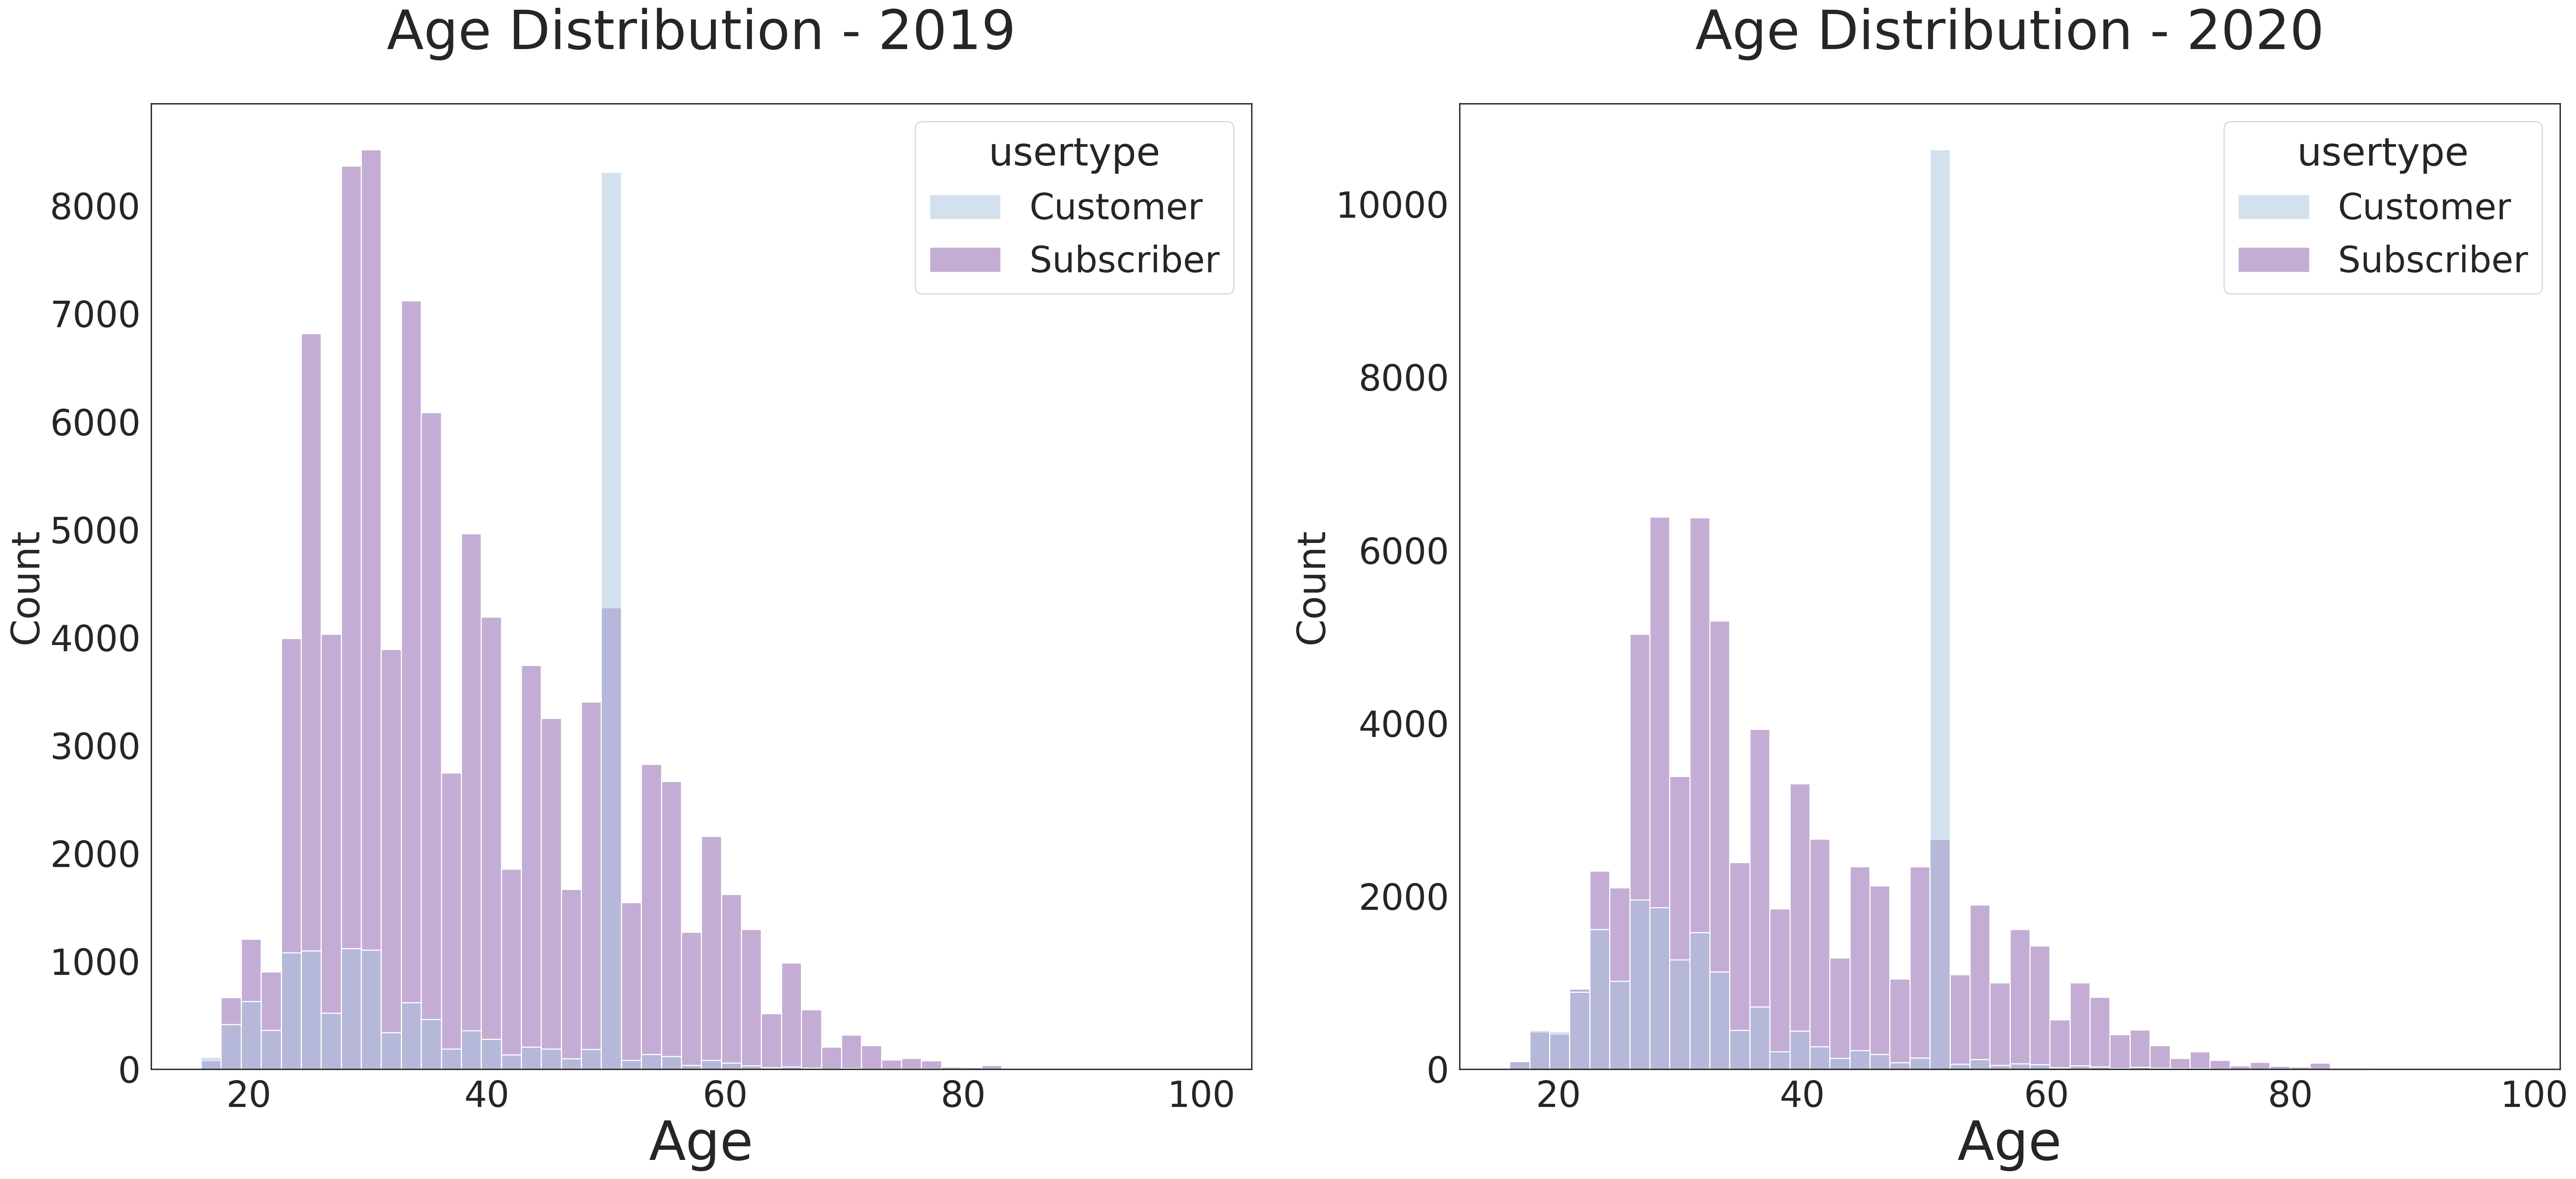

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(34,16), dpi=200)
y_title_margin = 1.05
sns.histplot(age[age['year']=='2019'], bins=50, \
             x="age", hue="usertype", palette="BuPu", ax=ax[0])
sns.histplot(age[age['year']=='2020'], palette="BuPu", bins=50, \
             x="age", hue="usertype", ax=ax[1])
ax[0].set_title("Age Distribution - 2019",y = y_title_margin, fontsize=50)
ax[1].set_title("Age Distribution - 2020",y = y_title_margin, fontsize=50)
ax[0].set_xlabel("Age", fontsize=50)
ax[1].set_xlabel("Age", fontsize=50)
fig.tight_layout()

why there is a peak at age of 55??

In [ ]:
df_2019_age_50 = age[(age['age']==50)&(age['start_year']==2019)]
df_2020_age_51 = age[(age['age']==51)&(age['start_year']==2020)]
df_50_51 = pd.concat([df_2019_age_50, df_2020_age_51], axis=0)

Text(0.5, 1.05, 'Customer/subscriber ratio of users born in 1969')

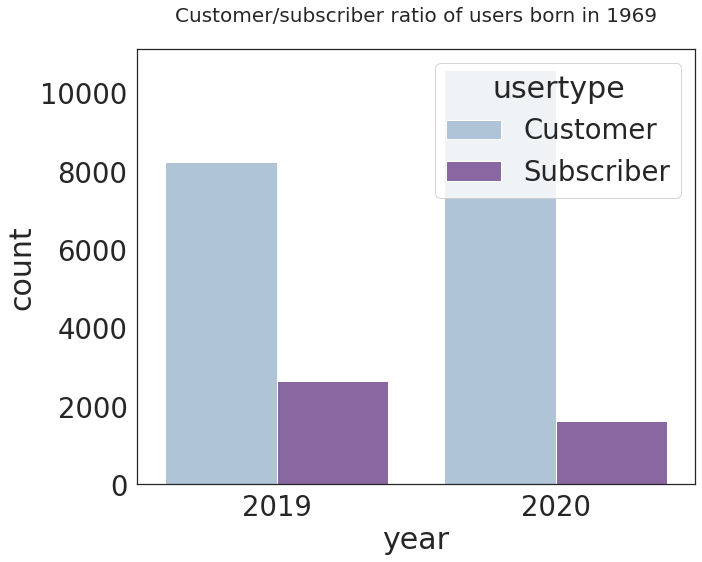

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=df_50_51, x='year', hue='usertype', palette="BuPu")
plt.title('Customer/subscriber ratio of users born in 1969',y=1.05, fontsize=20)
ax.set_xlabel("Age", fontsize=50)

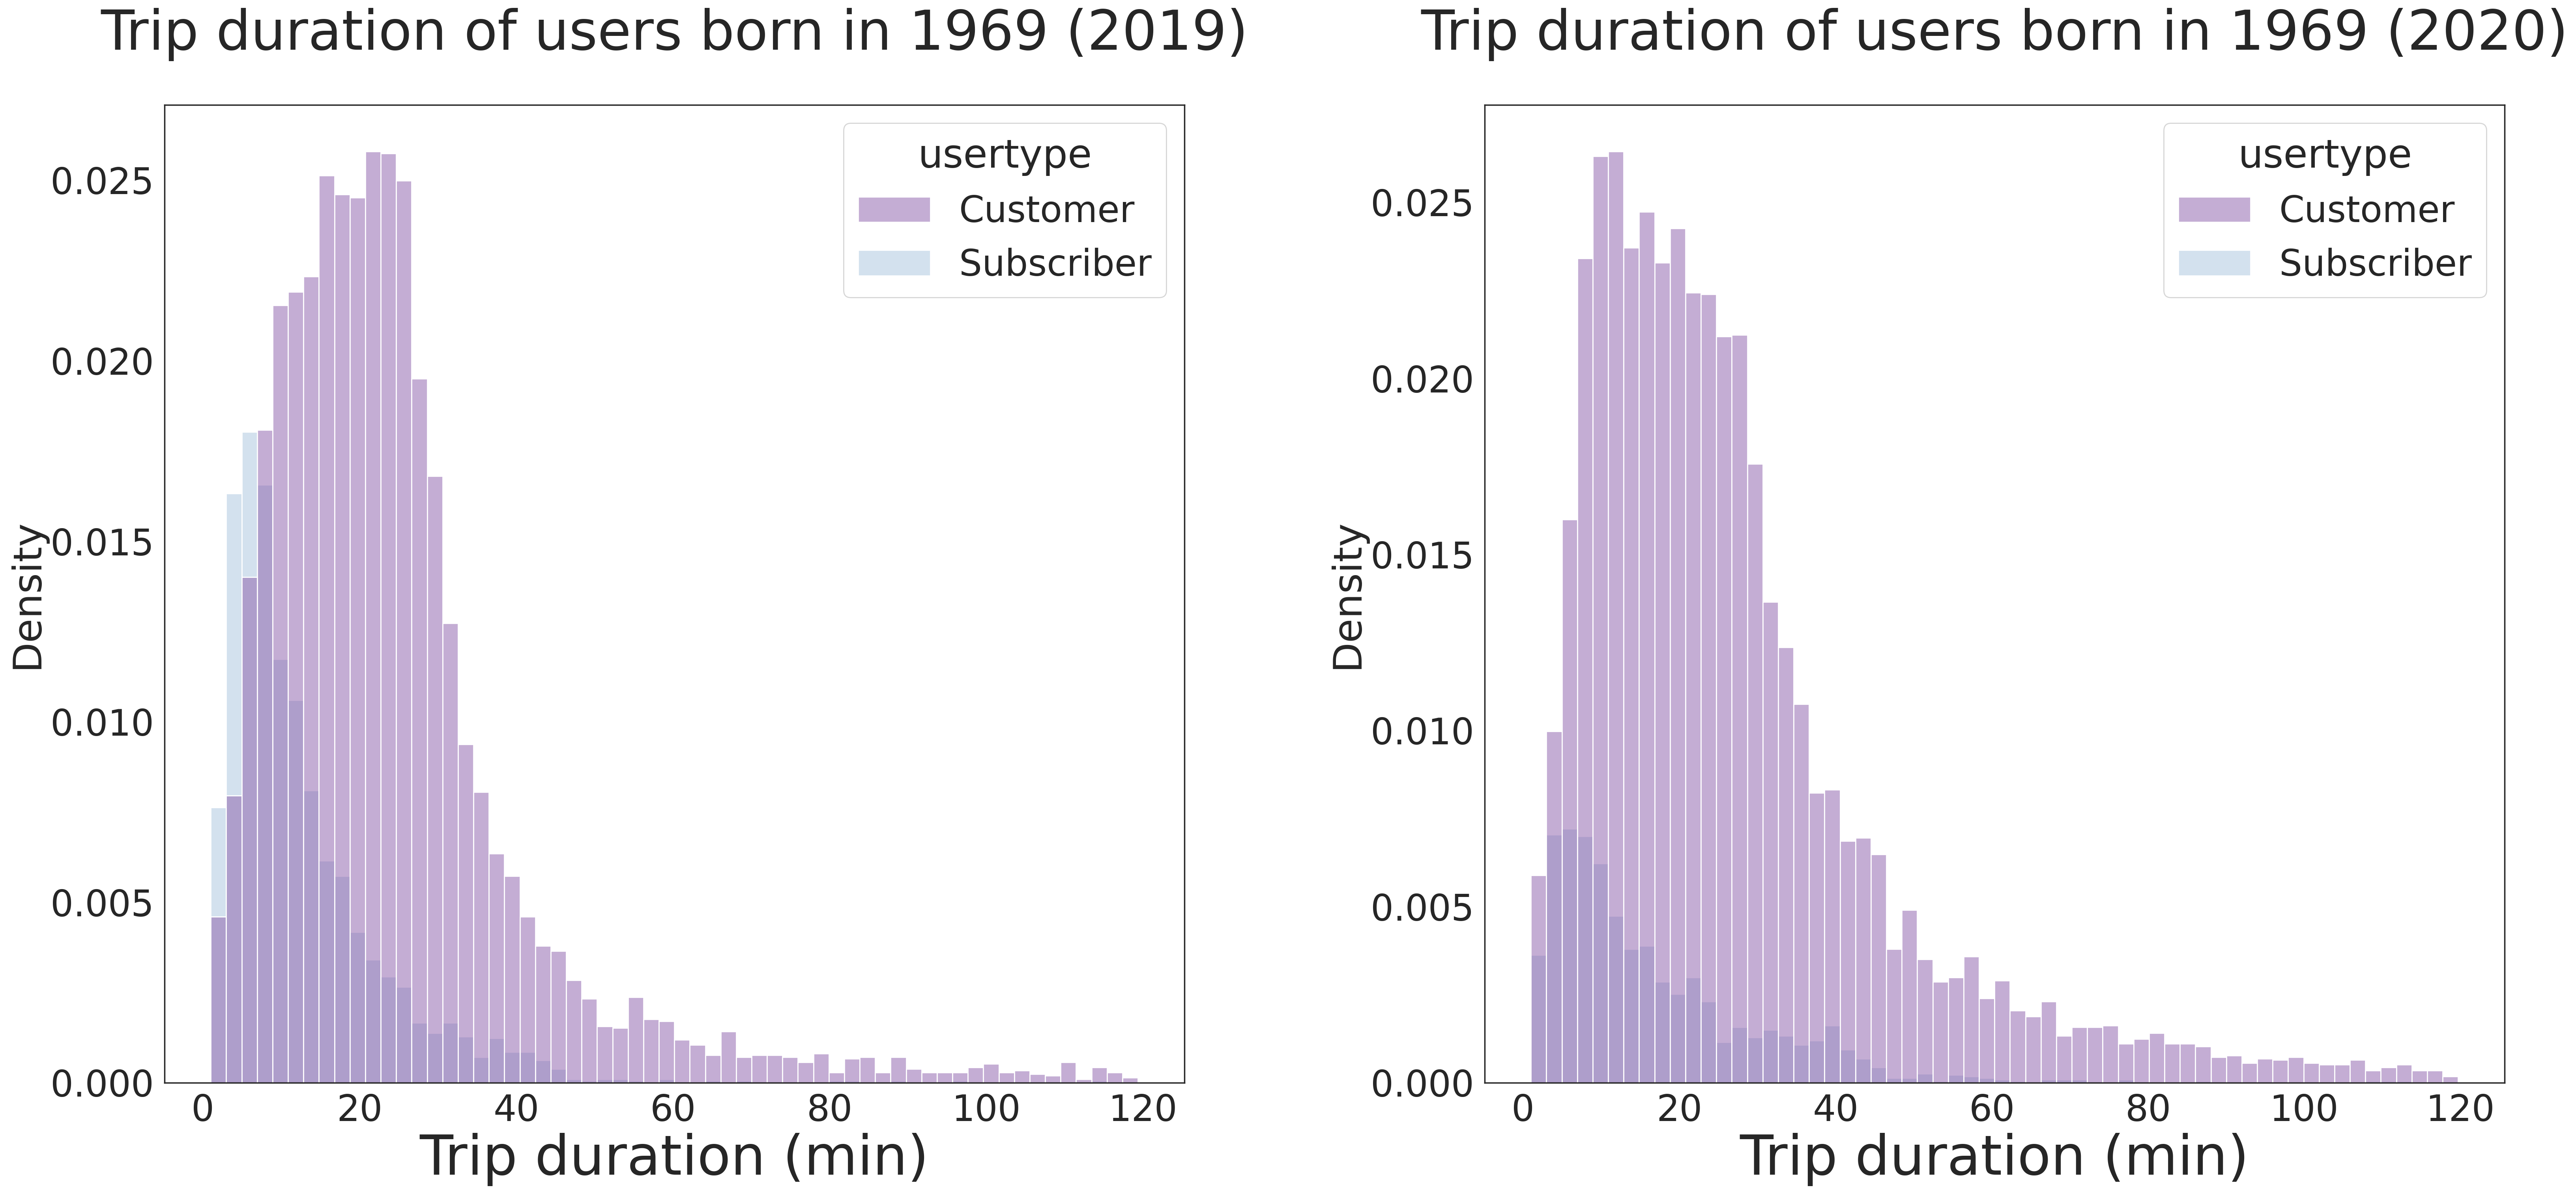

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(34,16), dpi=200)
y_title_margin = 1.05
sns.histplot(df_2019_age_50[df_2019_age_50['tripduration']<=120], bins=60, \
             x="tripduration", hue="usertype", stat='density', palette="BuPu_r", ax=ax[0])
sns.histplot(df_2020_age_51[df_2020_age_51['tripduration']<=120], palette="BuPu_r", bins=60, \
             x="tripduration", hue="usertype", stat='density', ax=ax[1])
ax[0].set_title("Trip duration of users born in 1969 (2019)",y = y_title_margin, fontsize=50)
ax[1].set_title("Trip duration of users born in 1969 (2020)",y = y_title_margin, fontsize=50)
ax[0].set_xlabel("Trip duration (min)", fontsize=50)
ax[1].set_xlabel("Trip duration (min)", fontsize=50)
fig.tight_layout()

### Subscribers vs short-term customers

In [ ]:
# Get subscriber and non-subscriber data
daily_subs = df_sub[df_sub['usertype'] == 'Subscriber']
daily_nonsubs = df_sub[df_sub['usertype'] == 'Customer']

In [ ]:
# Trip durations data
daily_subs_dur = daily_subs[daily_subs.tripduration <=120]['tripduration']
daily_nonsubs_dur = daily_nonsubs[daily_nonsubs.tripduration <=120]['tripduration']

In [ ]:
daily_subs_dur

5          5.500000
6         22.350000
8          1.450000
9          6.133333
10         2.200000
            ...    
324951     7.133333
324952     5.033333
324953    15.500000
324954    16.416667
324955    14.883333
Name: tripduration, Length: 207676, dtype: float64

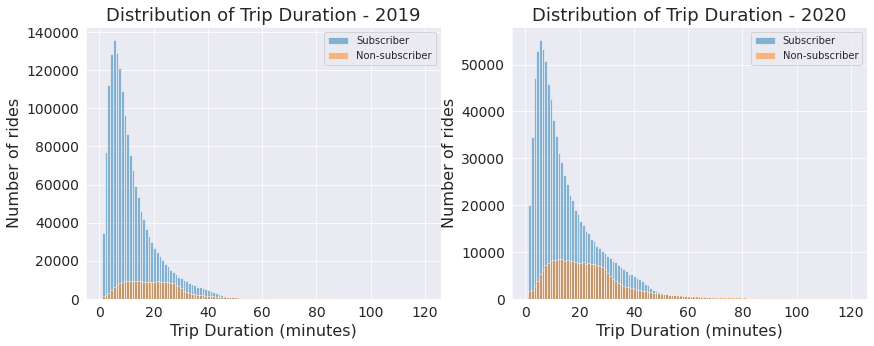

In [ ]:
# Histograms for Tripdurations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False, sharex=True)
ax1.hist(daily_subs_dur[daily_subs['start_year']==2019], bins=120, alpha=0.5, label='Subscriber')
ax1.hist(daily_nonsubs_dur[daily_nonsubs['start_year']==2019], bins=120, alpha=0.5, label='Non-subscriber')
ax1.set_title('Distribution of Trip Duration - 2019', fontsize=18)
ax1.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax1.set_ylabel('Number of rides', fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax1.legend()

ax2.hist(daily_subs_dur[daily_subs['start_year']==2020], bins=120, alpha=0.5, label='Subscriber')
ax2.hist(daily_nonsubs_dur[daily_nonsubs['start_year']==2020], bins=120, alpha=0.5, label='Non-subscriber')
ax2.set_title('Distribution of Trip Duration - 2020', fontsize=18)
ax2.set_xlabel('Trip Duration (minutes)', fontsize=16)
ax2.set_ylabel('Number of rides', fontsize=16)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax2.legend()

### Day of the week

In [ ]:
# Usage by the day of the week
subs_dayofweek = daily_subs.groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'usertype'])\
                                                    .size().unstack('start_dayofweek')
nonsubs_dayofweek = daily_nonsubs.groupby(['start_year', 'start_month', 'start_day', 'start_dayofweek', 'usertype'])\
                                                                 .size().unstack('start_dayofweek')
    
subs_dayofweek.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
nonsubs_dayofweek.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
sns.set(style="white", palette="BuPu_r", color_codes=True, font_scale=3)

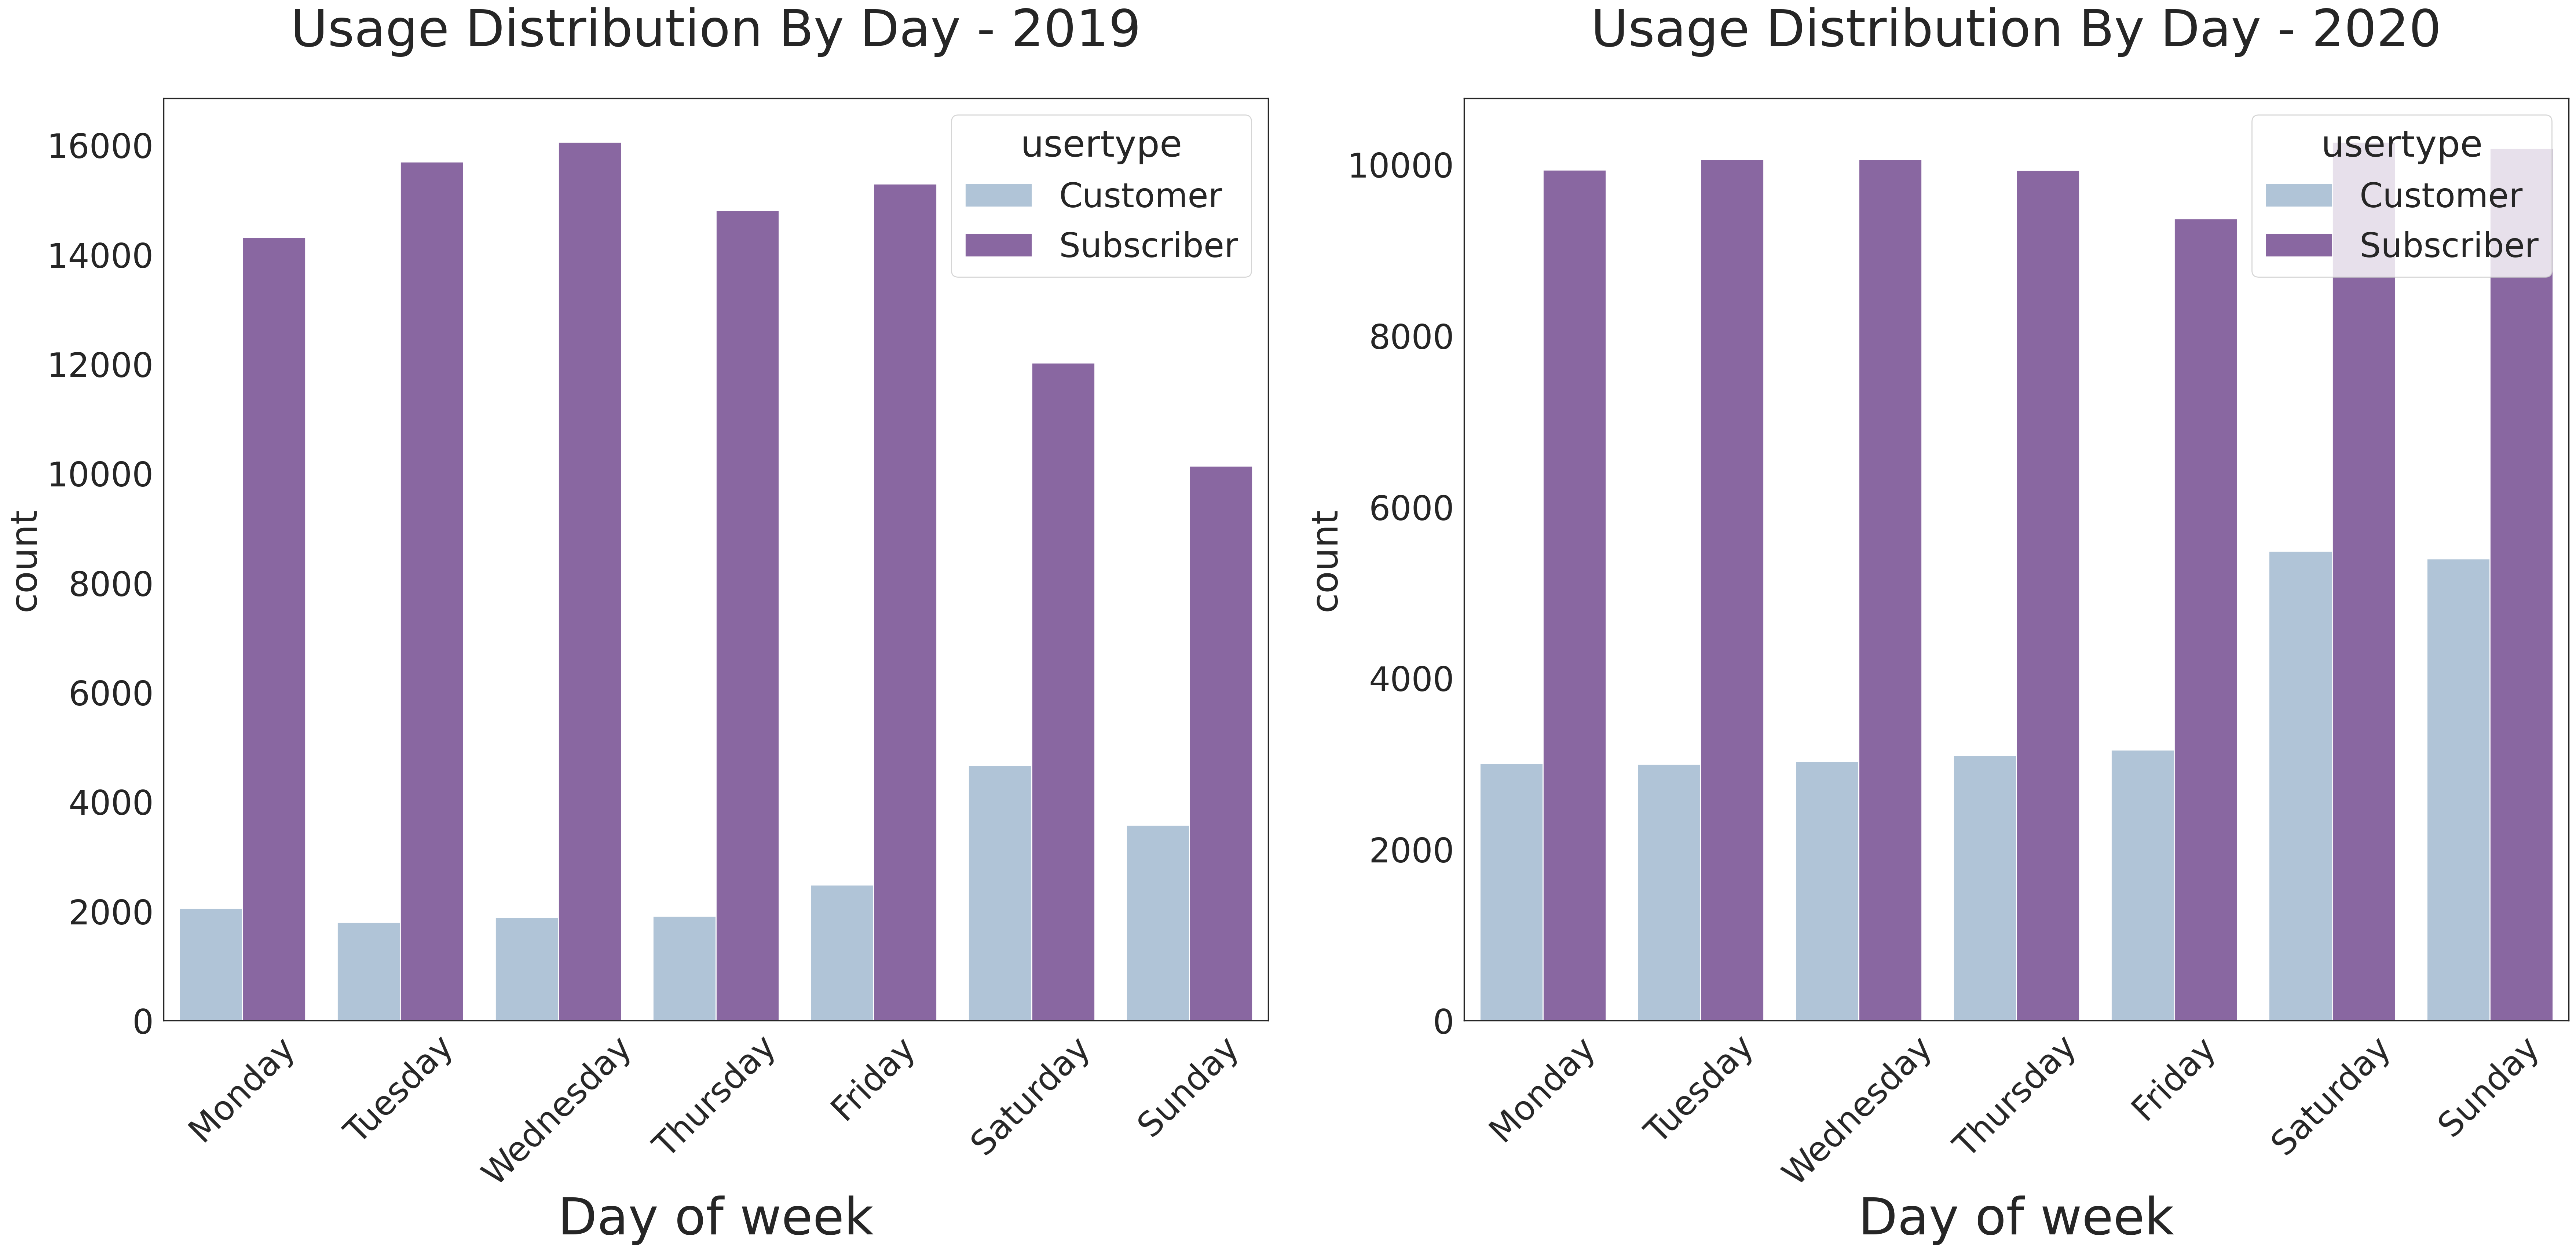

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(36,18), dpi=200)
y_title_margin = 1.05
sns.countplot(x='start_dayofweek', data=df_sub_2019, \
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],\
              hue='usertype', ax=ax[0], palette='BuPu')
sns.countplot(x='start_dayofweek', data=df_sub_2020, \
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],\
              hue='usertype', ax=ax[1], palette='BuPu')
ax[0].set_title("Usage Distribution By Day - 2019",y = y_title_margin, fontsize=50)
ax[1].set_title("Usage Distribution By Day - 2020",y = y_title_margin, fontsize=50)
ax[0].set_xlabel("Day of week", fontsize=50)
ax[1].set_xlabel("Day of week", fontsize=50)
ax[0].xaxis.set_tick_params(rotation=45)
ax[1].xaxis.set_tick_params(rotation=45)
fig.tight_layout()

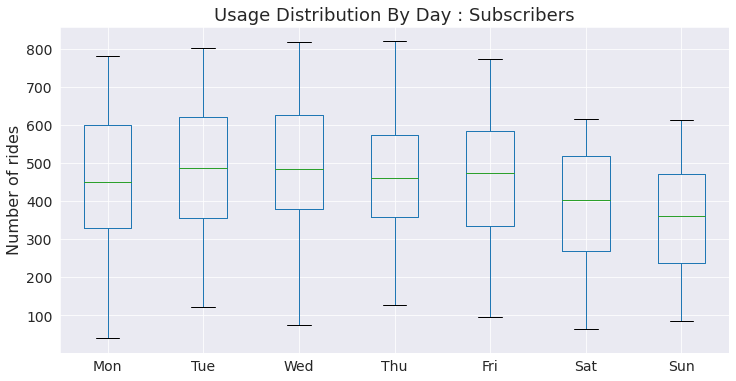

In [ ]:
# Plot the weekly usage distribution for subscribers
ax9 = subs_dayofweek.plot(kind='box',  figsize=(12, 6))
ax9.set_title('Usage Distribution By Day : Subscribers', fontsize=18)
ax9.set_ylabel('Number of rides', fontsize=16)
for tick in ax9.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax9.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

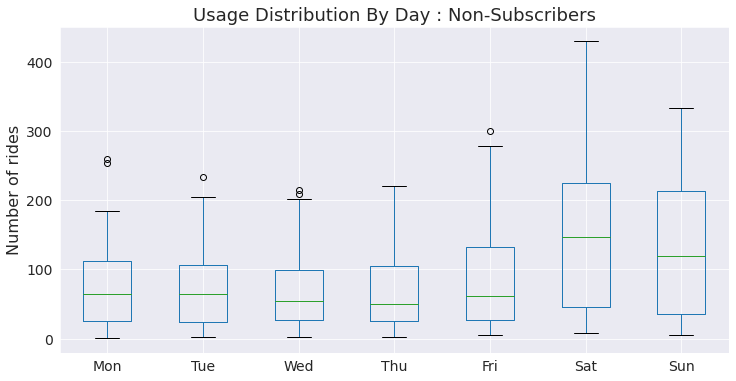

In [ ]:
# Plot the weekly usage distribution for non-subscribers
ax10 = nonsubs_dayofweek.plot(kind='box',  figsize=(12, 6))
ax10.set_title('Usage Distribution By Day : Non-Subscribers', fontsize=18)
ax10.set_ylabel('Number of rides', fontsize=16)
for tick in ax10.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax10.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

### Peak hour

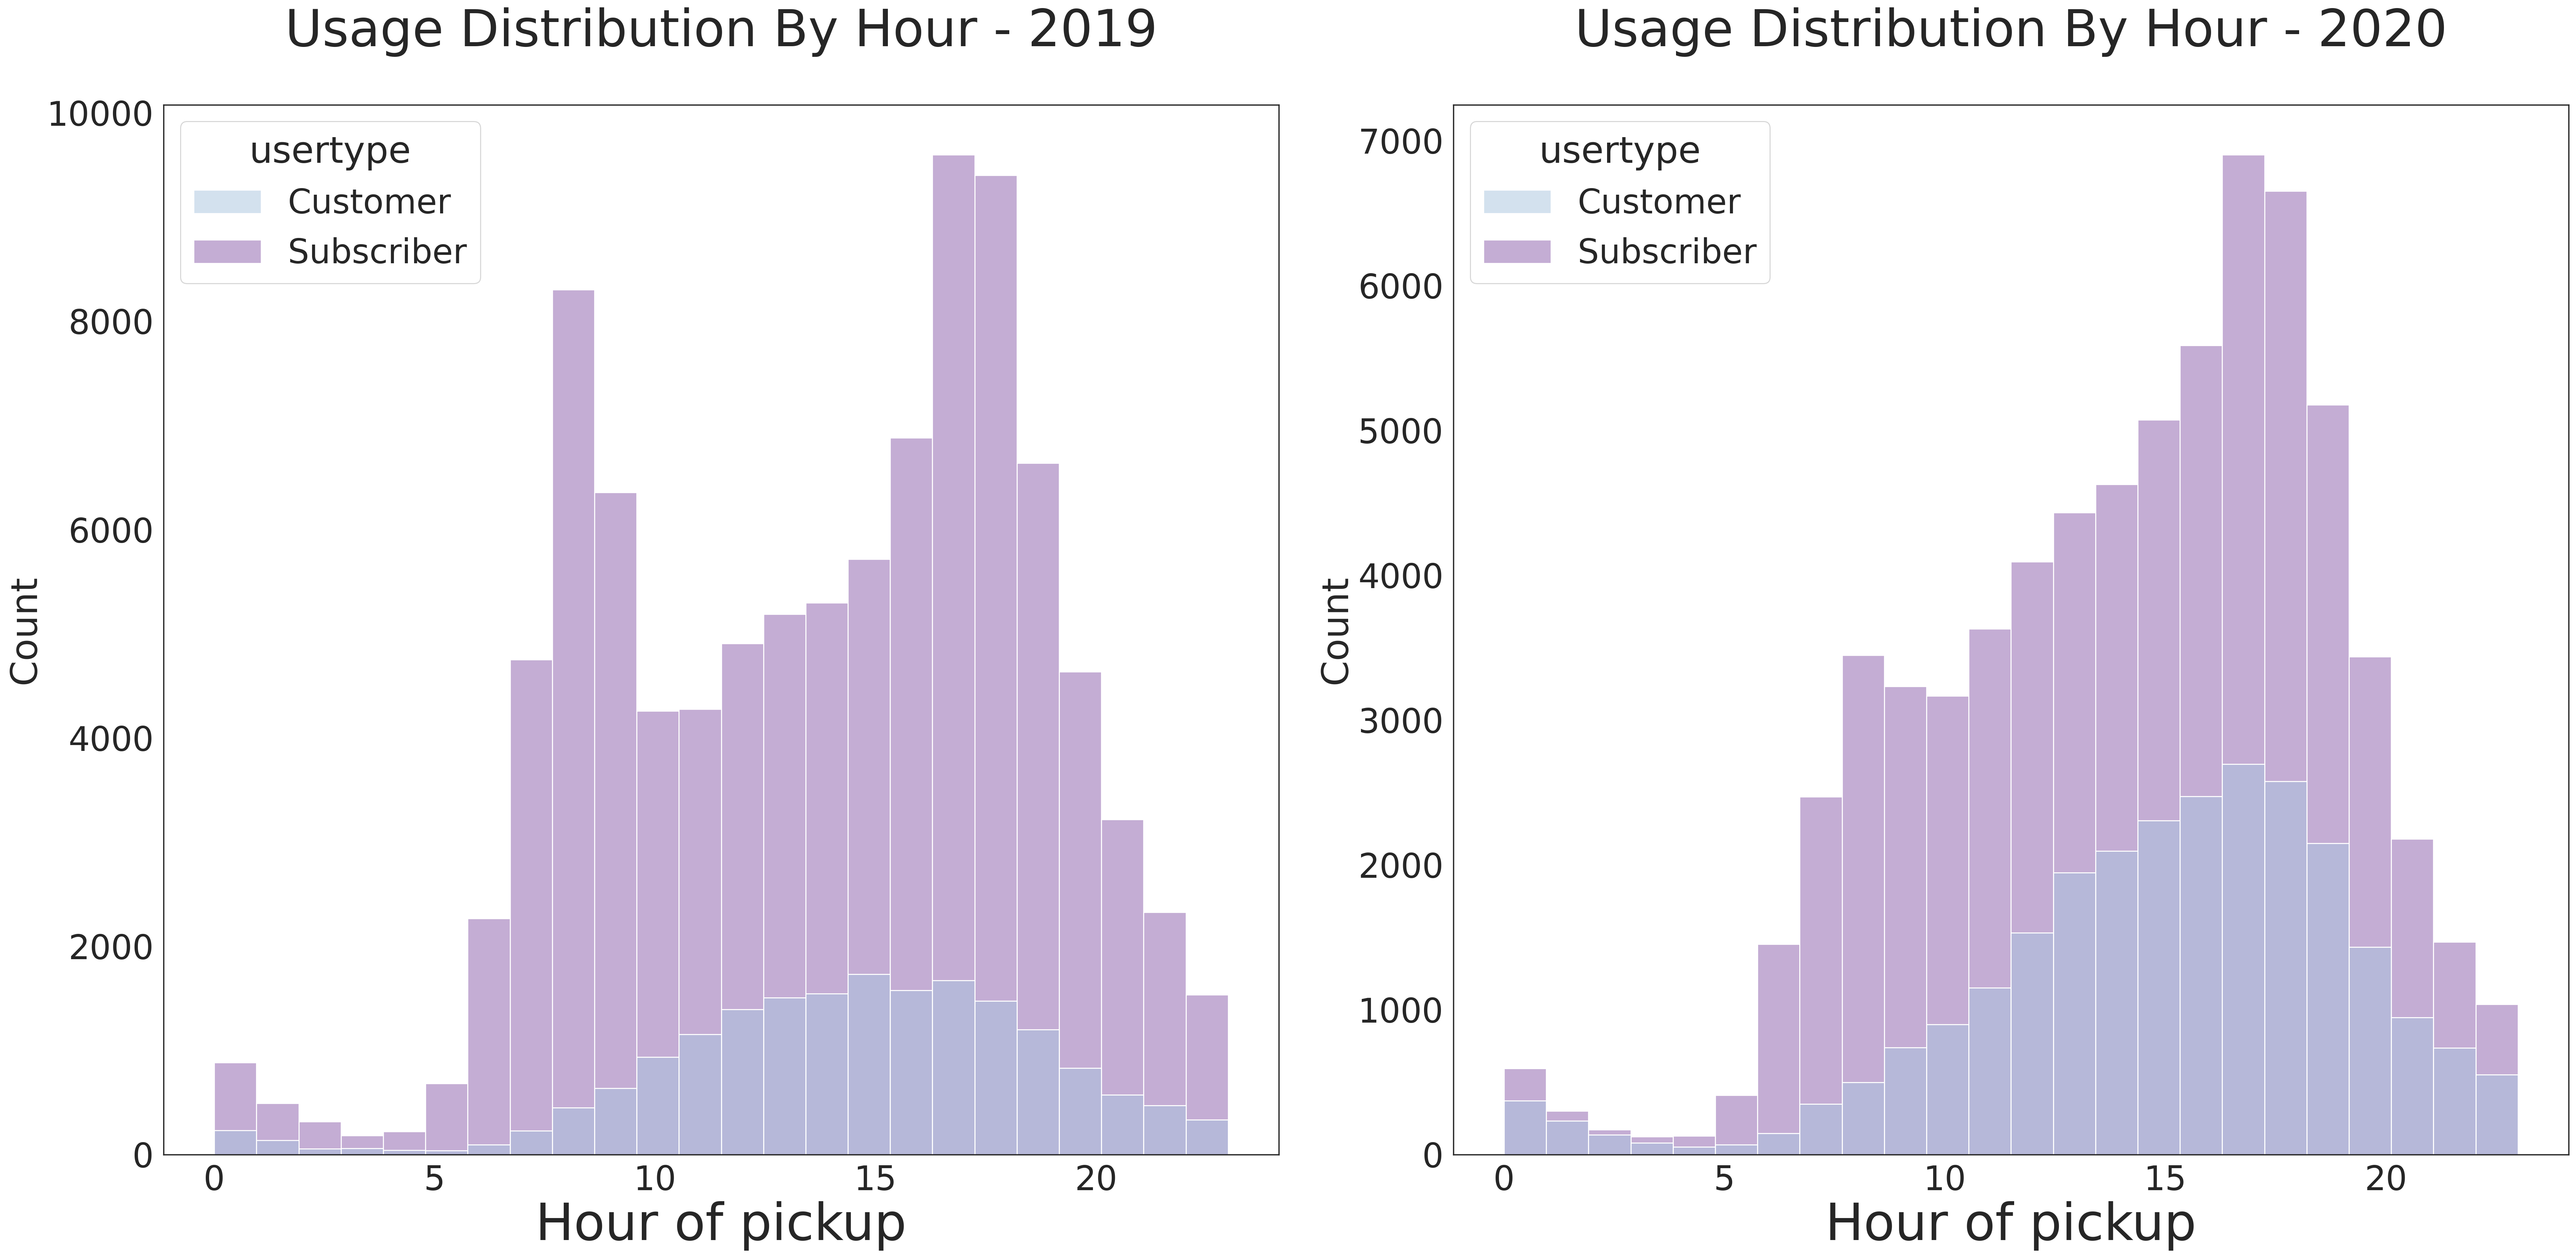

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(36,18), dpi=200)
sns.histplot(df_sub_2019, bins=24, x="start_hour", hue="usertype", palette="BuPu", ax=ax[0])
sns.histplot(df_sub_2020, bins=24, x="start_hour", hue="usertype", palette="BuPu", ax=ax[1])
ax[0].set_title("Usage Distribution By Hour - 2019",y = y_title_margin, fontsize=50)
ax[1].set_title("Usage Distribution By Hour - 2020",y = y_title_margin, fontsize=50)
ax[0].set_xlabel("Hour of pickup", fontsize=50)
ax[1].set_xlabel("Hour of pickup", fontsize=50)
fig.tight_layout()

### Popular stations for subscribers vs non-subscribers

In [ ]:
station_df = pd.read_csv('station_info.csv')

In [ ]:
station_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
pickups_subs[['pickups', 'st_id']].dtypes
pickups_subs = pickups_subs.astype('int32')
d_pickup[['st_id','pickups','year']] = d_pickup[['st_id','pickups','year']].astype('int32')

In [ ]:
d_pickup_2019 = d_pickup[d_pickup['year']==2019]
d_pickup_2020 = d_pickup[d_pickup['year']==2020]

In [ ]:
# Create a dataset for 2019 daily usage by location
by_station_2019 = d_pickup_2019[['pickups', 'st_id']].groupby('st_id').mean().reset_index()
by_station_2019['stds'] = d_pickup_2019[['pickups', 'st_id']].groupby('st_id').std().reset_index()['pickups']
by_station_2019['counts'] = d_pickup_2019[['pickups', 'st_id']].groupby(['st_id']).size().reset_index()[0]

highest10_by_mean_2019  = by_station_2019[by_station_2019['counts'] >= 100].sort_values('pickups', ascending=False).head(10)
lowest10_by_mean_2019 = by_station_2019[by_station_2019['counts'] >= 100].sort_values('pickups', ascending=True).head(10)

# Create a dataset for 2020 daily usage by location
by_station_2020 = d_pickup_2020[['pickups', 'st_id']].groupby('st_id').mean().reset_index()
by_station_2020['stds'] = d_pickup_2020[['pickups', 'st_id']].groupby('st_id').std().reset_index()['pickups']
by_station_2020['counts'] = d_pickup_2020[['pickups', 'st_id']].groupby(['st_id']).size().reset_index()[0]

highest10_by_mean_2020  = by_station_2020[by_station_2020['counts'] >= 100].sort_values('pickups', ascending=False).head(10)
lowest10_by_mean_2020 = by_station_2020[by_station_2020['counts'] >= 100].sort_values('pickups', ascending=True).head(10)

In [ ]:
print(len(by_station_2019))
print(len(by_station_2020))

929
1064


In [ ]:
# Top 10 bike stations for 2019
highest10_by_mean_2019 = highest10_by_mean_2019.merge(station_df, left_on='st_id', right_on='start_station_id')
highest10_by_mean_2019

st_id    pickups  ...  start_station_id             start_station_name
0    519  23.875758  ...             519.0          Pershing Square North
1   3255  18.655864  ...            3255.0                8 Ave & W 31 St
2    497  18.217910  ...             497.0             E 17 St & Broadway
3    435  18.119205  ...             435.0                W 21 St & 6 Ave
4    402  17.809449  ...             402.0             Broadway & E 22 St
5    285  17.118182  ...             285.0             Broadway & E 14 St
6    426  16.120611  ...             426.0          West St & Chambers St
7    358  15.764890  ...             358.0  Christopher St & Greenwich St
8    499  15.436202  ...             499.0             Broadway & W 60 St
9    459  14.877112  ...             459.0               W 20 St & 11 Ave

[10 rows x 6 columns]

In [ ]:
# Top 10 bike stations for 2020
highest10_by_mean_2020 = highest10_by_mean_2020.merge(station_df, left_on='st_id', right_on='start_station_id')
highest10_by_mean_2020

st_id    pickups  ...  start_station_id             start_station_name
0    426  14.234273  ...             426.0          West St & Chambers St
1    514  14.174009  ...             514.0               12 Ave & W 40 St
2   3141  14.061033  ...            3141.0                1 Ave & E 68 St
3   3906  13.465306  ...            3906.0           West St & Liberty St
4    435  12.857143  ...             435.0                W 21 St & 6 Ave
5    499  12.488987  ...             499.0             Broadway & W 60 St
6    358  12.441441  ...             358.0  Christopher St & Greenwich St
7    497  12.116854  ...             497.0             E 17 St & Broadway
8    402  11.633641  ...             402.0             Broadway & E 22 St
9   3256  11.516854  ...            3256.0    Pier 40 - Hudson River Park

[10 rows x 6 columns]

In [ ]:
# Bottom 10 bike stations for 2019
lowest10_by_mean_2019 = lowest10_by_mean_2019.merge(station_df, left_on='st_id', right_on='start_station_id')
lowest10_by_mean_2019

st_id   pickups  ...  start_station_id            start_station_name
0   3567  1.203540  ...            3567.0                11 St & 35 Ave
1   3596  1.213115  ...            3596.0     Sullivan Pl & Bedford Ave
2   3590  1.234286  ...            3590.0     Carroll St & Franklin Ave
3   3333  1.236641  ...            3333.0     Columbia St & Lorraine St
4   3564  1.242857  ...            3564.0                21 St & 36 Ave
5   3559  1.253425  ...            3559.0                21 St & 38 Ave
6   3769  1.259843  ...            3769.0        White St & Johnson Ave
7   3661  1.269430  ...            3661.0  Montgomery St & Franklin Ave
8   3765  1.276786  ...            3765.0       Bushwick Ave & Stagg St
9   3631  1.280702  ...            3631.0        Crown St & Bedford Ave

[10 rows x 6 columns]

In [ ]:
# Bottom 10 bike stations for 2020
lowest10_by_mean_2020 = lowest10_by_mean_2020.merge(station_df, left_on='st_id', right_on='start_station_id')
lowest10_by_mean_2020

st_id   pickups  ...  start_station_id             start_station_name
0   3866  1.134454  ...            3866.0         Wilson Ave & Moffat St
1   3333  1.150000  ...            3333.0      Columbia St & Lorraine St
2   3883  1.166667  ...            3883.0         Harman St & Seneca Ave
3   3849  1.174312  ...            3849.0   Suydam St & St. Nicholas Ave
4   3862  1.200000  ...            3862.0  Linden St & Knickerbocker Ave
5   3910  1.202899  ...            3910.0     Greene Ave & Grandview Ave
6   3765  1.204225  ...            3765.0        Bushwick Ave & Stagg St
7   3326  1.209677  ...            3326.0         Clinton St & Centre St
8   3330  1.212598  ...            3330.0              Henry St & Bay St
9   3843  1.217054  ...            3843.0          Myrtle Ave & Grove St

[10 rows x 6 columns]